# Atividade Perceptron
## Aluno: Gustavo Silveira Dias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Funções 
def degrauBipolar(u):
    return np.where(u >=-1,1,0)

# Função que classifica a amostra com base na rede já treinada
def classifica(w,x):
    u = np.dot(w.T, x)
    yhat = degrauBipolar(u)
    return yhat

## Implementação do Perceptron

In [3]:
# Passo 1: Obter o conjunto de amostras de treinamento 

# Carregar tabela de dados
dados = pd.read_csv('dataset_iris.csv', sep=';')

# Análise exploratória dos dados
#walker = pyg.walk(dados)

In [4]:
# Quantidade de elementos na amostra
n_amostras = dados.shape[0]
print(n_amostras)

# Quantidade variáveis de entrada (Subtrair a coluna de tipo)
n_variaveis = dados.shape[1] - 1
print(n_variaveis)

# Separando os dados contendo apenas as variáveis de entrada
x = dados.iloc[:,0:n_variaveis].values
print(x)

30
3
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [5]:
# Inserindo o bias 
bias = np.ones((n_amostras, 1)) * -1
x = np.hstack((x,bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985 -1.    ]
 [ 0.6418  1.0234  7.0427 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [6]:
# Passo 2: Do vetor de saídas Y, associar a saída esperada para x
y = dados.iloc[:,n_variaveis].values
print(y)

# Contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == -1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
1: 14


In [7]:
# Passo 3: Inicializar o vetor de pesos w com valores aleatórios
w = np.random.uniform(-1,1,n_variaveis + 1)
print(w)

[-0.06967158  0.05934657 -0.28202203 -0.41160772]


In [8]:
# Passo 4: Definir a taxa de aprendizado entre 0 e 1
# Taxa de aprendizado
eta = 0.01

# Passo 5: Calcular o numero de amostras em X
# Já foi feito  e está em n_amostras

# Passo 6: Definir a tolerancia ao erro (quantidade de épocas)
tolerancia = 0.01

# Passo 7: Setar o erro inicial maior que a tolerancia
erroMedio = tolerancia + 1


# Passo 8: Criar o vetor que irá armazenar o erro médio de cada época
erroEpocas = []

# Passo 9: Inicializa o contador de épocas
epoca = 0

# Passo 10: Define o maximo de épocas 
maxEpocas = 300


In [9]:
# Passo 11 e 12: Seta os critérios de parada
criterioErro = True
criterioEpoca = True

# Passo 13: Enquanto o erro for maior que a tolerancia e o numero de épocas for menor que o maximo de épocas
while criterioErro and criterioEpoca:
    # Passo 14: Seta o erro da epoca atual como zero
    erroAtual = 0

    # Passo 15: Incrementa o contador de épocas 
    epoca += 1

    # Passo 16: Embaralha as amostras de X e Y
    indicesEmbaralhados = np.random.permutation(n_amostras)
    
    # Passo 17: Para cada amostra no conjunto x faça
    for i in range(n_amostras):
        # Obter a amostra atual de X
        indiceAmostra = indicesEmbaralhados[i]
        # Captura a amostra atual a ser apresentada ao perceptron
        xiAmostra = x[indiceAmostra,:]

        # Passo 18: Calcular o potencial de ativação u
        u = np.dot(w.T, xiAmostra)

        # Passo 19: Calcular a saída prevista com base na função de ativação
        yhat = degrauBipolar(u)

        # Passo 20: Calcular o erro entre o valor esperado e o previsto
        e = y[indiceAmostra] - yhat

        # Passo 21: Atualizar os pesos aplicando a regra de Hebb
        w = w + ((eta * e) * xiAmostra)

        # Passo 22: Acumular o erro atual ao erro da época
        erroAtual += abs(e)

        # Passo 23: Calcular o erro médio da época
        erroMedio = erroAtual / n_amostras 

        # Passo 24: Armazena o erro médio da época no vetor de erros de todas épocas
        erroEpocas.append(erroMedio)
    
        # Passo 25 e 26: Verifica os critérios de parada
        criterioErro = erroMedio > tolerancia
        criterioEpoca = epoca < maxEpocas


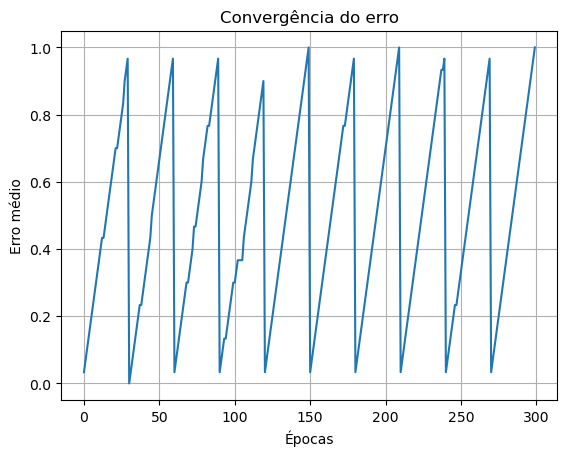

In [10]:
# Plotando a convergência do algoritmo com o erro época a época
plt.Figure(figsize=(4,4))
plt.plot(erroEpocas[:maxEpocas])
plt.title('Convergência do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.grid(True)
plt.show()

In [11]:
# Exibindo os pesos calibrados pela regra de Hebb
print('Conjunto de pesos W*')
print(w)

print('Épocas necessárias para convergência')
print(epoca)

Conjunto de pesos W*
[ 0.87656242 16.89409457 -9.86178603 -4.12160772]
Épocas necessárias para convergência
300


In [12]:
# Cria um vetor para receber todas as previsões realizadas pela RNA
yhat = np.zeros(n_amostras)

# Armazenar todas as previsões uma para cada amostra
for i in range(n_amostras):
    yhat[i] = classifica(w, x[i,:])

print(yhat)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0.]


## Análise de qualidade  de classificação

 Matriz de Confusão. /n [[14  0]
 [15  1]]


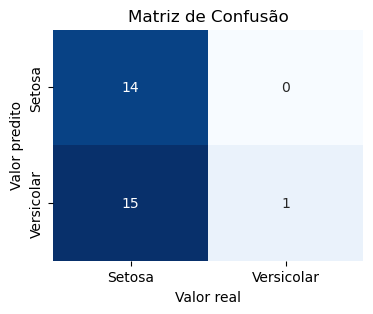

In [13]:
# Converter -1 em 0 para melhor visualizar a matriz de confusão
yhat_display = np.where(yhat == -1, 0, yhat)
y_display = np.where(y == -1, 0, y)


# Gera a matriz de confusão
cm = confusion_matrix(y_display, yhat_display)
print(' Matriz de Confusão. /n',cm)


# Plotar a matriz de confusão crocante
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Setosa','Versicolar'],
            yticklabels=['Setosa','Versicolar'])
plt.title('Matriz de Confusão')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.show()

In [14]:
# Calculo da acurácia 
acuracia = np.sum(yhat == y) / n_amostras * 100
print(f'Acurácia:', acuracia)

Acurácia: 3.3333333333333335


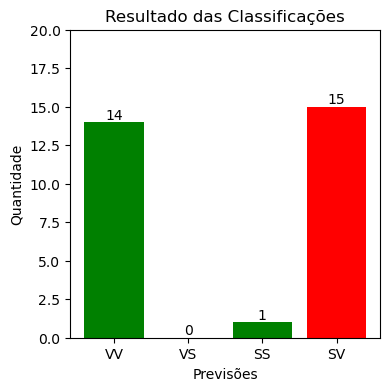

In [15]:
if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']
   
   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

In [16]:

# Definir cores conforme previsão
colors = ['red' if y == -1 else 'blue' for y in yhat]

# Criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calcular x3 para o hiperplano
# Se w[3] for o bias (intercepto)
x3_grid = (w[0]*x1_grid + w[1]*x2_grid - w[3]) / (-w[2])

# Criar figura
fig = go.Figure()

# Adicionar hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

# Adicionar pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

# Layout
fig.update_layout(
   title='Classificação 3D com Hiperplano',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed